# 1) Import Module

In [1]:
import pandas as pd             # for data cleaning and data pre-processing, CSV file I/O,etc
import numpy as np              # linear algebra & for mathematical computation
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns           # for visualization
from collections import Counter # to count occurrences
from tabulate import tabulate   # to make tables for results

import warnings                 # for warning removals in code output
warnings.filterwarnings('ignore')

# Scalers & Encoders
from sklearn.preprocessing import StandardScaler, LabelEncoder
#train-test split
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import (mean_squared_error, r2_score)
# Model Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib

import pickle           #to save and load model files as pkl file

In [2]:
import sklearn
print(sklearn.__version__)



1.5.1


### Importing the Processed Dataset (With error handling)

In [3]:
# 1.2) Importing the dataset (With error handling)
file_path = r"C:\Users\DELL\Capstone Project\CAR DETAILS.csv"  # Use raw string or double backslashes
file_name = file_path.split("\\")[-1]  # Split based on backslashes

try:
    # Reading the Excel file into a Pandas DataFrame
    df = pd.read_csv(file_path)  # Use pd.read_excel() for Excel files
    # Store the filename as an attribute in the DataFrame
    df.file_name = file_name
    print(f"\n'{df.file_name}' loaded successfully.")

# Exception to check if the file has some error like no file at the path, etc.
except FileNotFoundError:
    print(f"Error: '{file_name}' not found at the specified location {file_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


'CAR DETAILS.csv' loaded successfully.


## Machine Learning Steps

### Encoding the Dataset 

In [4]:
category_col = df.select_dtypes(include="object").columns
print(f"Categorical Columns in {df.file_name} :\n", category_col)

numerical_col = df.select_dtypes(include="number").columns
print(f"\nNumerical Columns in {df.file_name} :\n", numerical_col)

Categorical Columns in CAR DETAILS.csv :
 Index(['Brand', 'Model', 'Variant', 'Name', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

Numerical Columns in CAR DETAILS.csv :
 Index(['Year', 'Km_Driven', 'Selling_Price'], dtype='object')


In [5]:
# One hot encoder
df_one = df.copy()

In [8]:
# Using Label Encoder to encode categorical data
label_encoder = LabelEncoder()  # instance of encoder
# Loop to  encode data in df
for feature in category_col:
    df_one[feature] = label_encoder.fit_transform(df[feature])
df_one.head()

,Brand,Model,Variant,Name,Year,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,12,5,534,664,2007,70000,4,1,1,0,60000
1,12,536,643,921,2007,50000,4,1,1,0,135000
2,10,506,307,444,2012,100000,1,1,1,0,600000
3,5,361,645,83,2017,46000,4,1,1,0,250000
4,9,34,714,231,2014,141000,1,1,1,2,450000


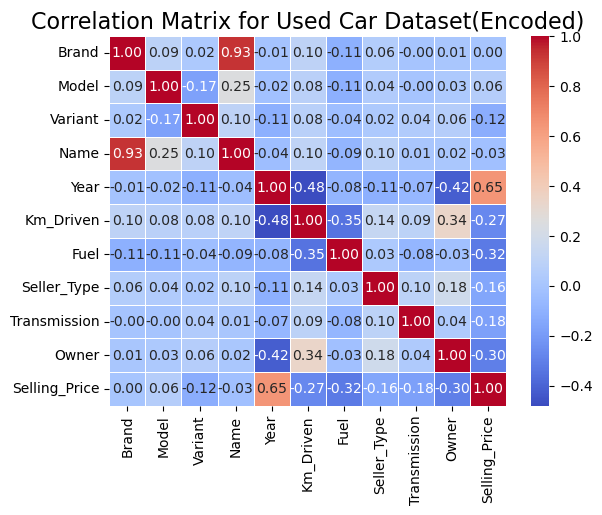

In [10]:
corr = df_one.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Used Car Dataset(Encoded)", fontsize=16)
plt.savefig("Correlation Graph - After Label Encoding")
plt.show()

### Saving the encoded dataset

In [11]:
import os
# Define the directory path and file path
directory = "../data/processed"
file_path = f"{directory}/cleaned_data.csv"

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the cleaned DataFrame to the CSV file
cleaned_data = df_one.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: ../data/processed/cleaned_data.csv


Dependant (y) & Independent (x) Features

1. Dropping dependant feature from dataset

In [12]:
x = df_one.drop(["Selling_Price"], axis=1)
y = df_one["Selling_Price"]

print(type(x))
print(type(y))
print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3202, 10)
(3202,)


2. Splitting The dataset

In [13]:
# splitting the dataset into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
print(f"Split Check Test values : {3194 * 0.3} & Train values : {3194 * 0.7}")
# rows , columns
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Split Check Test values : 958.1999999999999 & Train values : 2235.7999999999997
(2241, 10)
(961, 10)
(2241,)
(961,)


3. Standarizing the dataset

In [14]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.49276853,  1.60557014, -2.08808117, ...,  0.43677483,
         0.23994651, -0.70851099],
       [-0.49276853, -0.82790221,  0.80900814, ...,  0.43677483,
         0.23994651,  0.87609293],
       [-0.01564851,  1.35791587,  0.35897485, ...,  0.43677483,
         0.23994651,  0.87609293],
       ...,
       [-0.73132854, -1.42550271,  1.11371818, ...,  0.43677483,
         0.23994651, -0.70851099],
       [-0.01564851, -1.46857302,  1.01058555, ...,  0.43677483,
         0.23994651,  0.87609293],
       [ 1.17715154, -0.8763563 , -0.53171604, ...,  0.43677483,
         0.23994651, -0.70851099]])

## Model Selection - Evaluation (testing,scoring)

In [17]:
# Create a list of models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
]

# Define a list of model names
model_names = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Random Forest",
    "k-Nearest Neighbors",
    "Gradient Boosting",
    "Ada Boost",
]

# Initialize variables to keep track of the best model
best_model_name = None
best_r2_score = -float("inf")
best_model = None

# Initialize an empty list to store results
all_results = []

# Function to evaluate regression models


def evaluate_regression_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)

    # Mean Squared Error and R-squared Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display results in tabular format
    results_table = [
        ["Model", model_name],
        ["Mean Squared Error", mse],
        ["R-squared Score", r2],
    ]

    print(tabulate(results_table, headers=[
          "Metric", "Value"], tablefmt="heavy_grid"))

    # Store results in the dictionary
    return {
        "Model": model_name,
        "Mean Squared Error": mse,
        "R-squared Score": r2,
    }


# Iterate over the models
for model, model_name in zip(models, model_names):
    print(f"\n{('-' * 40)}\n{model_name}\n{('-' * 40)}")

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate and store results for regression model
    results = evaluate_regression_model(model, model_name, X_test, y_test)
    all_results.append(results)

    # Update the best model if needed
    if results["R-squared Score"] > best_r2_score:
        best_r2_score = results["R-squared Score"]
        best_model_name = model_name
        best_model = model

# Create a DataFrame from the results
results_df = pd.DataFrame(all_results)

# Sorting the dataframe by 'R-squared Score' in descending order
sorted_results_df = results_df.sort_values(
    by="R-squared Score", ascending=False)

# Displaying the sorted dataframe
print("\nSorted Models by R-squared Score:")
print(sorted_results_df)

# Print the best model based on R-squared score
print(f"\nBest Model based on R-squared Score: {best_model_name}")
best_model_name


----------------------------------------
Linear Regression
----------------------------------------
Metric              Value
------------------  ------------------
Model               Linear Regression
Mean Squared Error  26618717481.974277
R-squared Score     0.5365825346479489

----------------------------------------
Ridge Regression
----------------------------------------
Metric              Value
------------------  ------------------
Model               Ridge Regression
Mean Squared Error  26616342902.407406
R-squared Score     0.5366238747930894

----------------------------------------
Lasso Regression
----------------------------------------
Metric              Value
------------------  ------------------
Model               Lasso Regression
Mean Squared Error  26618695273.477665
R-squared Score     0.5365829212858557

----------------------------------------
Random Forest
----------------------------------------
Metric              Value
------------------  ---------------

'Random Forest'

### Model performance table (Basic)

In [18]:
model_performance = pd.DataFrame(results_df)
model_performance

,Model,Mean Squared Error,R-squared Score
0,Linear Regression,2.661872e+10,0.536583
1,Ridge Regression,2.661634e+10,0.536624
2,Lasso Regression,2.661870e+10,0.536583
3,Random Forest,1.287734e+10,0.775813
4,k-Nearest Neighbors,5.187173e+10,0.096941
5,Gradient Boosting,1.356366e+10,0.763864
6,Ada Boost,2.749342e+10,0.521354


## Save the best model and Load the model.

Best Model Selection & saving as final model (Manual Hard-codeing method)

In [19]:
# Set up the Random Forest model
final_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Train the Random Forest model
final_model.fit(x, y)


RandomForestRegressor(random_state=42)

Saving the best model for testing

In [20]:
# Models to evaulate the name and relevant parameter to take for best fit model fitting
models_dict = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "k-Nearest Neighbors": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada Boost": AdaBoostRegressor(),
}
# Retrieve the value using the key
retrieved_value = models_dict.get(best_model_name)

if retrieved_value is not None:
    selected_model_name = best_model_name
    selected_model = best_model
    # selected_model_params = retrieved_value.get_params()
    print(f"Best Model Name: {selected_model_name}")
    print(f"\nRetrieved Model Instance: {selected_model}")

Best Model Name: Random Forest

Retrieved Model Instance: RandomForestRegressor()


Storing the best model details

In [21]:
# Assuming selected_model_name and selected_model have been defined
f_modelname = selected_model_name
f_model = selected_model

# Print the best model name and its parameters
print(f"Best Selected Model name: '{f_modelname}' & \nits parameters:\n{f_model.get_params()}")

# Fit the selected model to the data
final_model = f_model
final_model.fit(x, y)


Best Selected Model name: 'Random Forest' & 
its parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


RandomForestRegressor()

## Saving Model as pickle file and dumping it to use later on

In [22]:
# Define the directory path
model_directory = "../models"

# Check if the directory exists, if not, create it
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the final model using pickle
pickle.dump(final_model, open(f"{model_directory}/{f_modelname}.pkl", "wb"))

print(f"Model saved successfully at: {model_directory}/{f_modelname}.pkl")

Model saved successfully at: ../models/Random Forest.pkl


Loading the saved model

In [23]:
load_model = pickle.load(
    open(f"../models/{f_modelname}.pkl", "rb"))  # rb = read binary
print(f"Name of loaded Model : {f_modelname}")
load_model

Name of loaded Model : Random Forest


RandomForestRegressor()

Testing the loaded model and predicting on test dataset

In [24]:
# Testing the imported model
print("Length of test data: ", len(load_model.predict(X_test)))
load_model.predict(X_test)

Length of test data:  961


array([ 130470.        ,  205196.65666667,  132370.        ,
         65357.5       ,  369060.        ,  215000.        ,
         93825.        ,  253653.31333333,  463719.97      ,
        156300.        ,  671170.        ,  686110.        ,
        289109.95      ,  438489.99      ,  251060.        ,
        179299.99      ,  100760.        ,  244249.99      ,
        481150.        ,  133443.84      ,  227550.        ,
        619750.        ,  478349.96      ,  153169.97      ,
        231050.        ,  687269.94      ,  419959.98      ,
        208888.57142857,  466280.        ,  190019.99      ,
        135099.98      ,  626510.        ,  693150.        ,
        824789.99      ,  753289.96      ,  339490.        ,
        482709.98      ,  622269.99      ,  133950.        ,
        313910.        ,  181520.        ,  454389.34      ,
        120030.        ,  918189.89      ,  338800.        ,
        459750.        ,  319960.        ,  635129.99      ,
        328549.97      ,

Generating sample data from cleaned df to test on the trained model.

In [25]:
random_datasample = df_one.sample(20)
random_datasample_df = random_datasample.drop("Selling_Price", axis=1)
print(random_datasample_df.shape)
random_datasample_df.head()

(20, 10)


,Brand,Model,Variant,Name,Year,Km_Driven,Fuel,Seller_Type,Transmission,Owner
799,19,559,478,1194,2012,80000,1,1,1,2
2156,9,34,716,232,2018,13500,4,0,1,0
478,3,63,645,26,2016,41000,4,0,1,0
650,12,15,517,688,2017,50000,4,1,1,0
461,17,127,364,994,2014,65000,1,0,1,0


Resetting the index as the randomly generated data has no continuos index (wil delete later,just for understanding)

In [26]:
random_datasample_df.reset_index()

,index,Brand,Model,Variant,Name,Year,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,799,19,559,478,1194,2012,80000,1,1,1,2
1,2156,9,34,716,232,2018,13500,4,0,1,0
2,478,3,63,645,26,2016,41000,4,0,1,0
3,650,12,15,517,688,2017,50000,4,1,1,0
4,461,17,127,364,994,2014,65000,1,0,1,0
5,2382,12,528,694,924,2016,23000,4,0,1,2
6,28,10,219,63,375,2019,15000,4,1,1,0
7,1014,11,355,558,581,2013,120000,1,1,1,2
8,2639,12,363,689,810,2013,60000,1,1,1,2
9,2825,12,447,708,888,2013,120000,1,1,1,0


Saving the random sample dataset and removing the index

In [27]:
random_datasample_df.to_csv("interimrandom_sample.csv", index=False)

Loading the sample data and checking basics

In [28]:
testsample_df = pd.read_csv("interimrandom_sample.csv")
print(
    "Shape of loaded sample dataframe:",
    testsample_df.shape,
    "\n\nSample Dataframe contents",
)
testsample_df

Shape of loaded sample dataframe: (20, 10) 

Sample Dataframe contents


,Brand,Model,Variant,Name,Year,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,19,559,478,1194,2012,80000,1,1,1,2
1,9,34,716,232,2018,13500,4,0,1,0
2,3,63,645,26,2016,41000,4,0,1,0
3,12,15,517,688,2017,50000,4,1,1,0
4,17,127,364,994,2014,65000,1,0,1,0
5,12,528,694,924,2016,23000,4,0,1,2
6,10,219,63,375,2019,15000,4,1,1,0
7,11,355,558,581,2013,120000,1,1,1,2
8,12,363,689,810,2013,60000,1,1,1,2
9,12,447,708,888,2013,120000,1,1,1,0


Making Predictions on sample dataset against the trained model

In [29]:
# making prediction on random data
predicted_data = load_model.predict(testsample_df)
print(f"The predicted data from {f_modelname} model:\n", predicted_data)

The predicted data from Random Forest model:
 [459430.         759480.         255399.99       172409.82
 561319.99       391239.99       521750.         274750.
 252779.99       375776.66666667 212079.35       595500.
 424479.97       155859.99       346199.96       442836.65666667
 337289.99       970020.         157869.99       124730.        ]


Comparision of Actual and Predicted values by the model

In [30]:
# Compare the actual data and predicted data
prediction_data = random_datasample.copy()
prediction_data["predicted_target"] = predicted_data

# Calculate the absolute percentage difference
prediction_data["percentage_difference"] = abs(
    (random_datasample["Selling_Price"] - predicted_data) /
    random_datasample["Selling_Price"]
) * 100

# Print the actual and predicted data
print(f"Actual Data and Predicted Data Comparison based on {f_modelname} model:\n")

# Display the results where the absolute percentage difference is less than or equal to 20%
safe_predictions = prediction_data[prediction_data["percentage_difference"] <= 20]

# Print the safe predictions
print("Safe Predictions:")
print(safe_predictions[["Selling_Price", "predicted_target", "percentage_difference"]])

# Print the count and percentage of safe predictions
safe_percentage = (len(safe_predictions) / len(prediction_data)) * 100
print(f"\nPercentage of Safe Predictions: {safe_percentage:.2f}%")

if safe_percentage >= 90:
    print(f"\nOur model based on '{f_modelname}' is well trained, with {safe_percentage:.2f}% safe predictions.")
else:
    print(f"Our model based on '{f_modelname}' needs more training to improve safety, currently at {safe_percentage:.2f}% safe predictions.")

# Save the results as a DataFrame
final_results_df = prediction_data[["Selling_Price", "predicted_target", "percentage_difference"]]

# Save the results to CSV in the same directory
final_results_df.to_csv('model_predicted_results.csv', index=False)


Actual Data and Predicted Data Comparison based on Random Forest model:

Safe Predictions:
      Selling_Price  predicted_target  percentage_difference
799          400000     459430.000000              14.857500
2156         800000     759480.000000               5.065000
478          239000     255399.990000               6.861921
650          150000     172409.820000              14.939880
461          525000     561319.990000               6.918093
2382         375000     391239.990000               4.330664
28           500000     521750.000000               4.350000
1014         285000     274750.000000               3.596491
2639         240000     252779.990000               5.324996
2825         365000     375776.666667               2.952511
583          229999     212079.350000               7.791186
1144         600000     595500.000000               0.750000
68           450000     424479.970000               5.671118
518          135000     155859.990000              15.4

In [32]:
model = joblib.load('Random Forest.pkl')  # Load your existing model
joblib.dump(model, 'Random_Forest_compressed.pkl', compress=('gzip', 3))


['Random_Forest_compressed.pkl']